In [1]:
import pandas as pd
import numpy as np
import alphalens as al
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
factor_data = pd.read_csv('./test/alphalens/factor_data/factor_data_AI_ALPHA.csv', index_col=['date', 'asset'], parse_dates=['date'])

In [3]:
factor_data.head()

,,1D,factor,factor_quantile
date,asset,,,
2015-01-05,AEONTS,0.004630,0.480389,4
2015-01-06,AEONTS,0.004608,0.478923,4
2015-01-07,AEONTS,0.009174,0.477406,4
2015-01-08,AEONTS,0.000000,0.465027,2
2015-01-09,AEONTS,0.009091,0.464405,2


In [4]:
# set parameters
demeaned = False
group_adjust = False
equal_weight = False

Returns Analysis


,1D
Ann. alpha,0.011
beta,1.005
Mean Period Wise Return Top Quantile (bps),21.431
Mean Period Wise Return Bottom Quantile (bps),-11.543
Mean Period Wise Spread (bps),32.974


<Figure size 1800x2000 with 0 Axes>

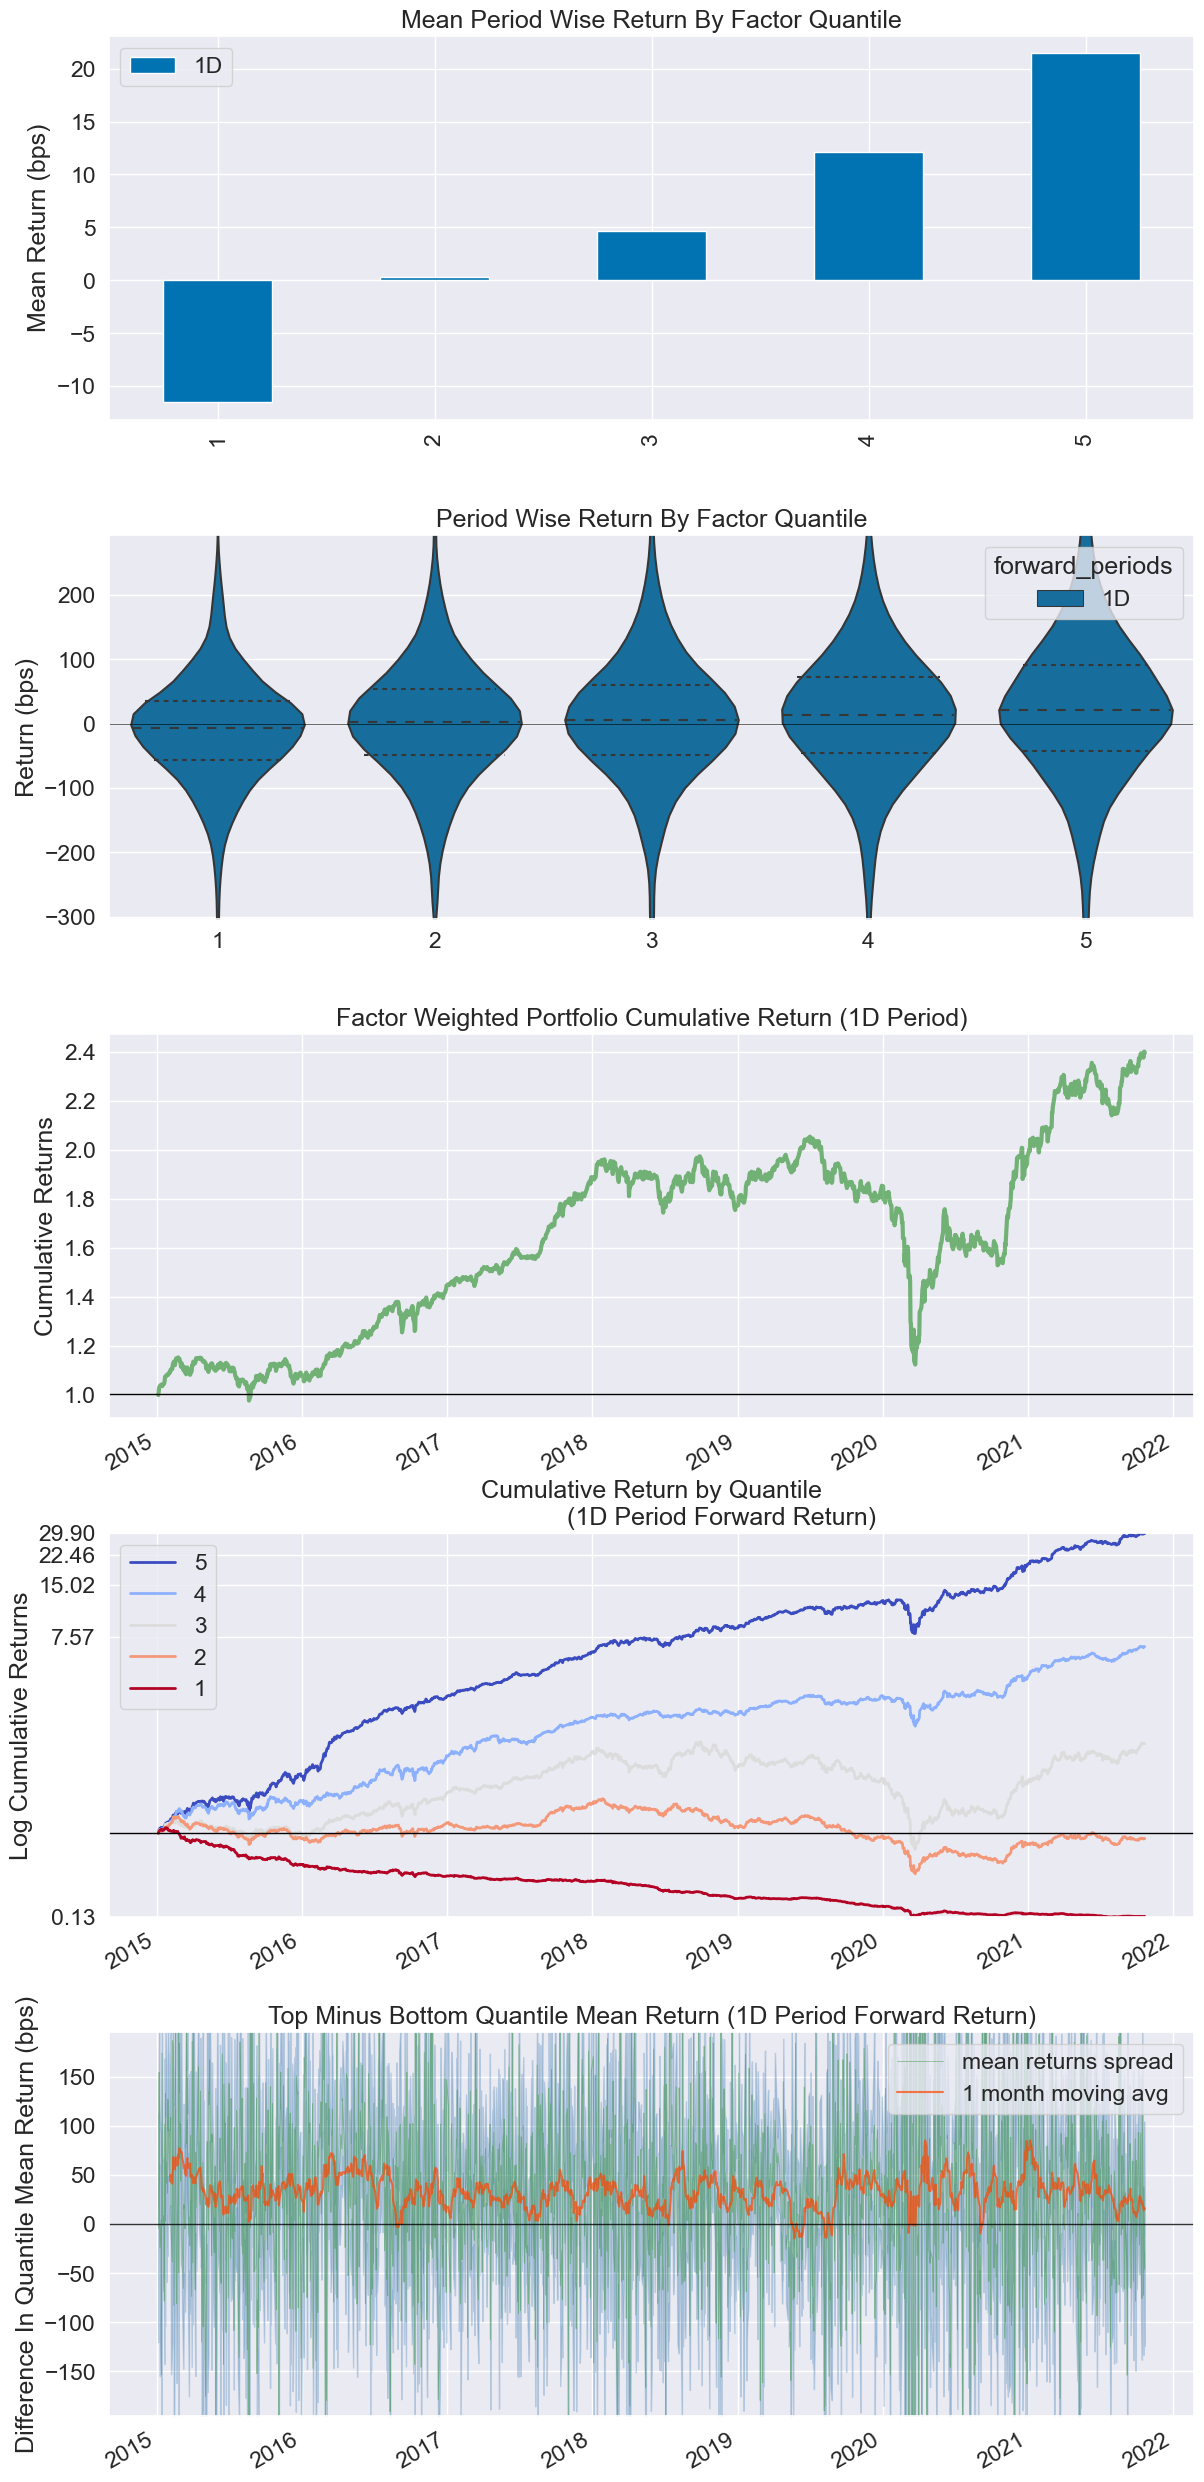

In [5]:
# Return analysis
plt.figure(figsize=(18, 20))
al.tears.create_returns_tear_sheet(factor_data,
                                   long_short=False,
                                   group_neutral=False,
                                   by_group=False)

Information Analysis


,1D
IC Mean,0.071
IC Std.,0.160
Risk-Adjusted IC,0.443
t-stat(IC),18.041
p-value(IC),0.000
IC Skew,-0.062
IC Kurtosis,-0.297


<Figure size 640x480 with 0 Axes>

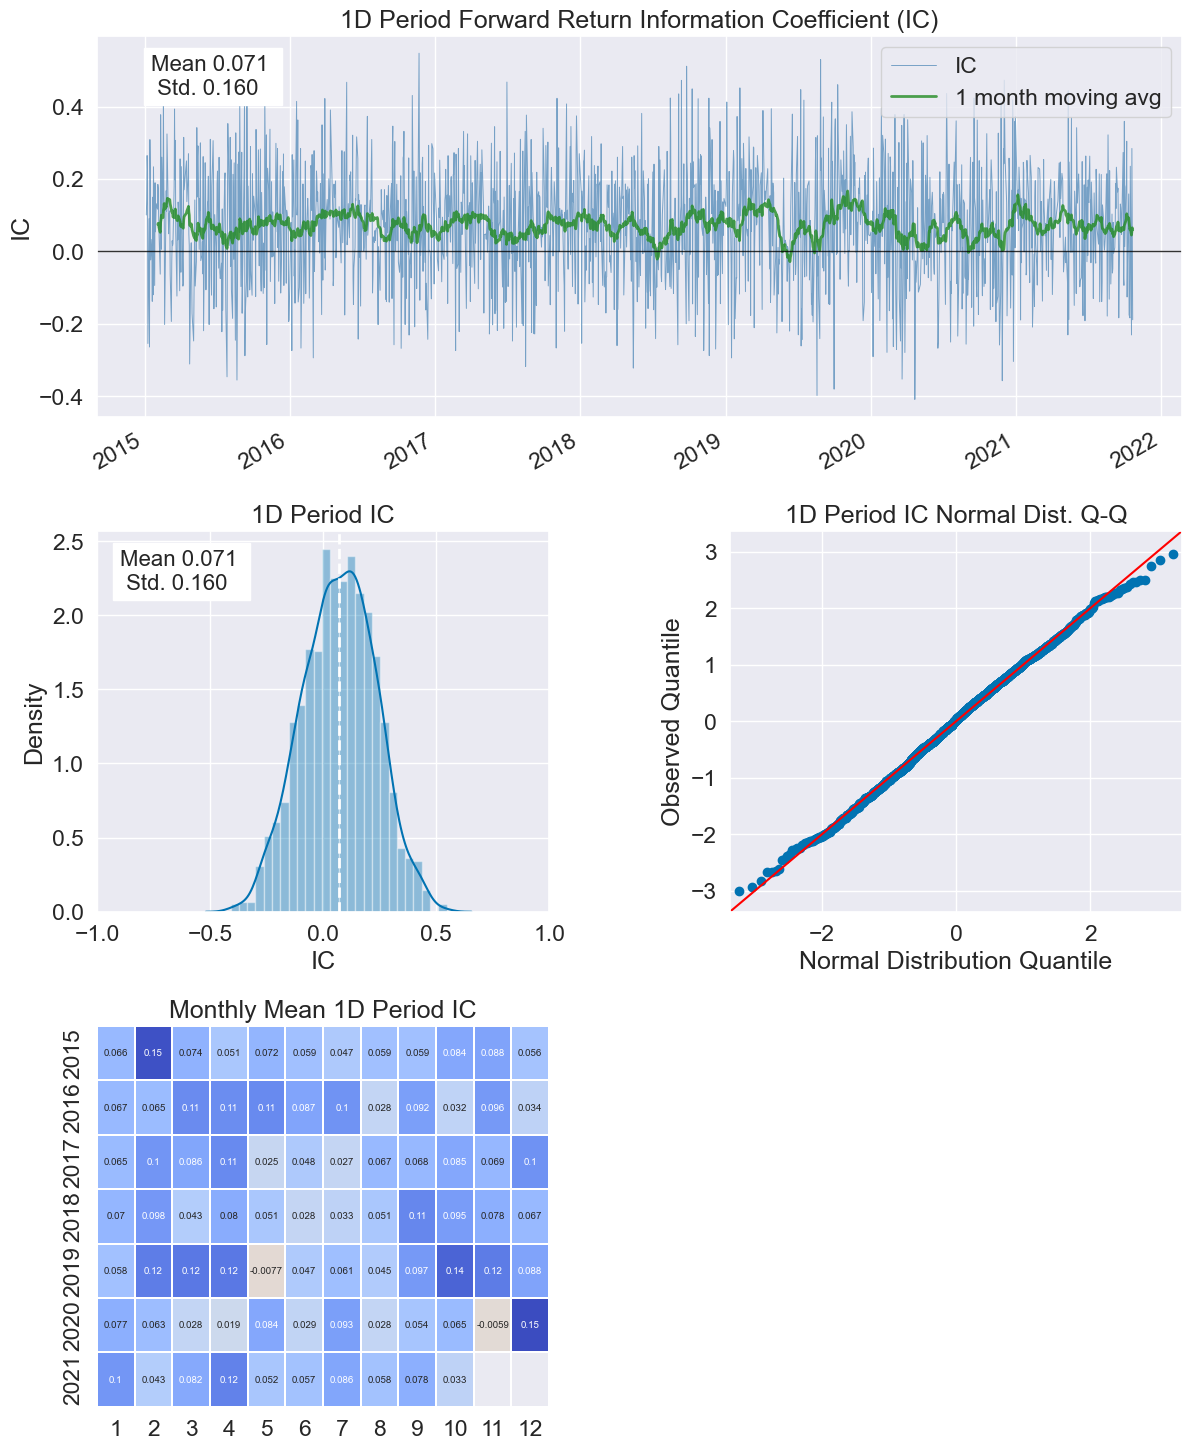

In [6]:
# Information coefficient analysis
al.tears.create_information_tear_sheet(factor_data,
                                       group_neutral=False,
                                       by_group=False)

Turnover Analysis


,1D
Quantile 1 Mean Turnover,0.417
Quantile 2 Mean Turnover,0.631
Quantile 3 Mean Turnover,0.666
Quantile 4 Mean Turnover,0.638
Quantile 5 Mean Turnover,0.430


,1D
Mean Factor Rank Autocorrelation,0.642


<Figure size 640x480 with 0 Axes>

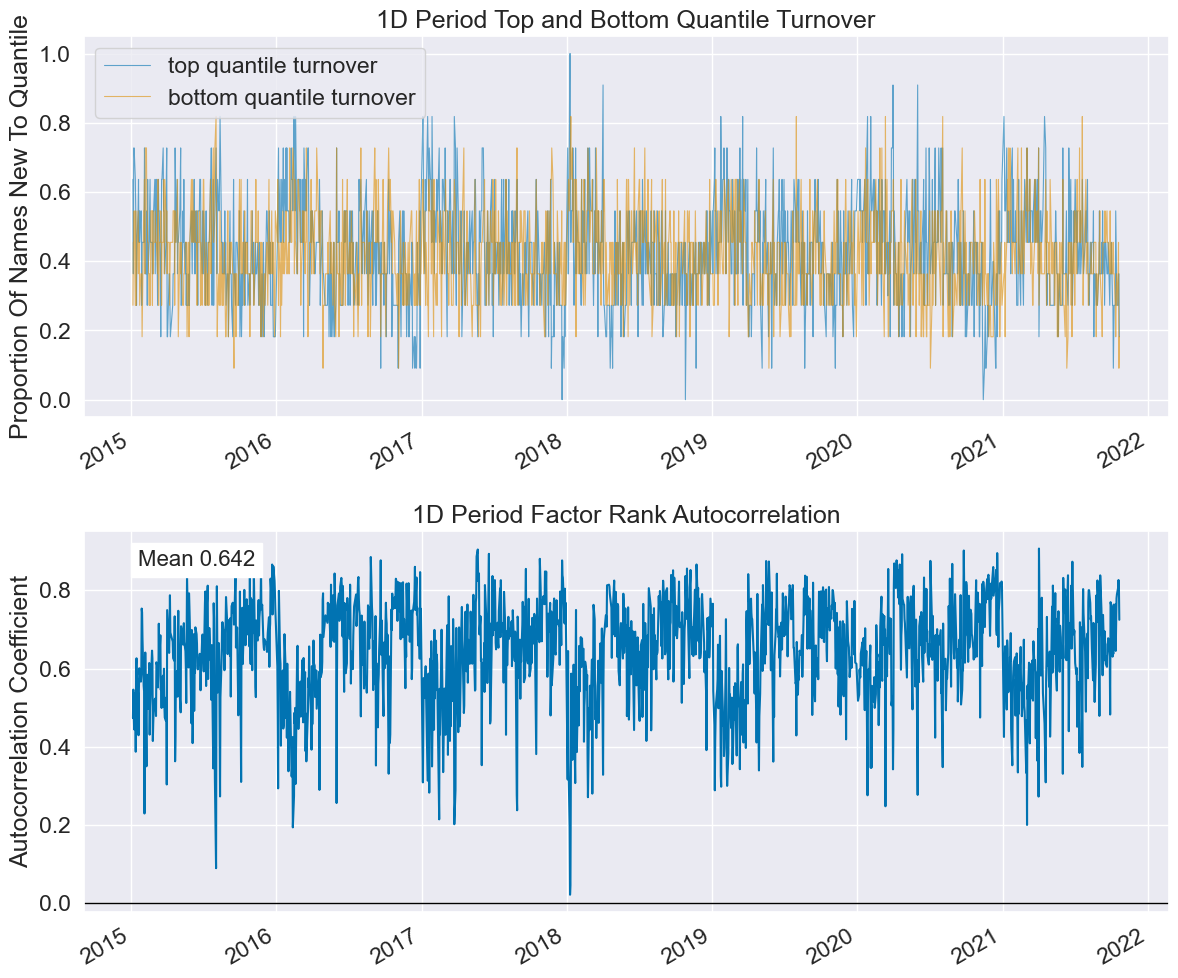

In [7]:
# Turnover analysis
# ! note that create_turnover_tear_sheet was modified since the original code throws an error. in the get_forward_returns_columns, I changed .get_values() to .values since the former does not exist in the current version of the library anymore (reference is in the cell below)
al.tears.create_turnover_tear_sheet(factor_data)

In [8]:
al.utils.get_forward_returns_columns(factor_data.columns, require_exact_day_multiple=True).values

array(['1D'], dtype=object)